# 1. Подготовка данных

#### 1.1. Откройте файлы и изучите их.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import plotly.graph_objects as go
import numpy as np
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 60

Загрузка данных

In [4]:
train = pd.read_csv('./gold/gold_recovery_train.csv')

In [5]:
test = pd.read_csv('./gold/gold_recovery_test.csv')

In [6]:
df = pd.read_csv('./gold/gold_recovery_full.csv')

In [7]:
train = train.drop('Unnamed: 0', axis=1)
test = test.drop('Unnamed: 0', axis=1)
df = df.drop('Unnamed: 0', axis=1)

Изучение данных

In [8]:
(train.shape), (test.shape), (df.shape)

((16860, 87), (5856, 53), (22716, 87))

In [11]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,...,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,...,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.497069,19.369147,34.118526,16.250511,3.049646,6.733907,2.353017,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,...,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,14.265474,4.592547,9.001494,2.488248,25.880539,-499.989656,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,11.316280,7.25,0.991265,8.603505,10.354494,19.167579,33.969464,16.491823,3.124664,6.471768,2.416800,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,1599.541515,-499.827444,...,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,14.115662,4.624775,8.842896,2.458187,26.005245,-499.929616,23.886657,-499.951928,23.913535,-499.442343,23.957717,-499.901982,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500

In [8]:
train.sample()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,...,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
2974,2016-05-17 21:59:59,6.304786,8.931325,10.492651,43.424574,66.656304,11.69729,2.45902,11.17194,3.948626,137.811539,12.165699,8.2,0.888909,7.992458,8.30509,16.077722,36.520645,17.676888,3.865876,7.784358,6.634588,1200.103244,-499.471609,1200.296899,-500.317162,1201.167462,-500.518424,1200.641931,-500.200156,...,1150.490815,-500.29299,1050.009413,-499.525956,949.0971,-500.71342,900.113492,-500.96278,17.945136,4.078158,11.786636,5.338729,26.05082,-503.181807,23.913429,-499.578414,24.977935,-500.000616,21.993775,-499.923801,9.973218,-499.370184,8.033293,-500.500639,9.011393,-499.131992,6.007942,-499.753848,19.988218,-499.26092


In [9]:
train.tail()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,...,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,123.381787,8.028927,6.5,1.304232,6.559174,12.445966,7.056338,32.940215,22.854592,6.531541,3.934320,2.314352,1648.421193,-400.382169,1648.742005,-400.359661,1648.578230,-399.363624,1648.833984,-399.669220,...,1047.963596,-498.413079,946.640977,-499.152477,849.664935,-499.214461,849.758091,-497.448664,0.0,0.0,0.0,0.0,35.043205,-499.045671,29.906659,-499.979939,26.002402,-499.953431,22.987238,-499.967351,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,120.878188,7.962636,6.5,1.302419,6.612376,12.623947,7.542264,32.925325,23.002490,6.629725,4.089124,2.462890,1649.820162,-399.930973,1649.357538,-399.721222,1648.656192,-401.195834,1649.725133,-400.636306,...,1048.565741,-500.932810,949.773589,-500.023144,848.515225,-500.289405,850.013123,-496.822119,0.0,0.0,0.0,0.0,35.026062,-499.891945,29.921795,-499.949663,26.031747,-500.384612,22.991058,-500.079590,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,105.666118,7.955111,6.5,1.315926,7.128896,12.633558,7.941900,31.856742,22.298149,6.278250,4.457457,2.612231,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,-399.988275,1649.772714,-399.831902,...,1049.604390,-500.549053,952.702732,-502.352296,849.016017,-500.505677,850.455635,-506.897968,0.0,0.0,0.0,0.0,35.003586,-501.083794,29.990533,-611.855898,25.948429,-500.067268,22.968268,-499.839442,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-1

In [10]:
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [11]:
test.sample()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
4298,2017-10-28 02:59:59,228.64659,13.986671,6.73,1.991537,1603.352301,-499.572213,1598.516219,-499.625853,1598.22195,-501.489481,1598.045003,-550.361611,11.922175,5.228156,547.444501,53.620747,39.697253,11.468707,19.996702,7.196675,19.994031,7.203227,1299.555806,-299.770053,1150.10997,-500.048988,1097.026209,-499.782712,993.040402,-500.252183,948.019265,-500.605457,948.854898,-500.670442,29.127481,-500.249999,25.99503,-500.031082,25.060622,-499.972214,23.019379,-500.326469,17.996308,-497.493396,16.039331,-500.029657,15.016918,-500.9405,11.098579,-501.159301,16.004179,-500.087898


In [12]:
test.tail()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5851,2017-12-31 19:59:59,173.957757,15.963399,8.07,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,-499.599127,1400.334792,-499.243459,11.638973,4.695306,521.685155,66.758479,42.022027,10.554544,10.109194,7.203935,10.110793,7.198171,1399.935264,-299.999637,1049.641991,-500.074887,951.923857,-499.648793,852.337438,-498.464443,851.436769,-500.285584,851.461345,-499.735650,21.912132,-499.915179,19.909080,-499.734909,24.939573,-500.098479,12.968448,-499.952023,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.07,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,-503.587739,1447.653388,-480.403849,11.338091,4.478381,530.195798,62.560684,41.096377,10.254051,9.979495,7.200895,9.978855,7.201957,1406.122319,-299.057200,1055.715243,-498.250207,956.850266,-497.403941,855.386714,-495.702676,852.071335,-499.442753,851.328986,-496.579809,25.322301,-497.034975,23.310568,-498.892647,26.369171,-499.222375,17.704862,-499.545681,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.07,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,-520.667442,1502.585343,-498.260225,11.285908,4.405327,546.306868,73.647513,41.095485,10.169094,10.182219,7.196255,10.185461,7.198676,1396.203070,-300.210722,1047.879742,-499.604248,948.963429,-499.549567,856.325597,-500.095616,850.614597,-499.473713,850.279578,-498.508374,29.075948,-500.528402,26.888005,-500.975799,28.000224,-500.565876,22.996528,-500.477583,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.07,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,-487.479567,1502.688918,-501.569723,11.289710,4.343488,547.331405,78.066446,41.715740,10.071156,10.730915,7.200058,10.726349,7.200834,1403.942288,-300.030119,1049.802289,-499.795576,950.769390,-500.374645,847.647198,-499.920332,849.413

In [13]:
df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,...,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,...,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.497069,19.369147,34.118526,16.250511,3.049646,6.733907,2.353017,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,...,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,14.265474,4.592547,9.001494,2.488248,25.880539,-499.989656,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,11.316280,7.25,0.991265,8.603505,10.354494,19.167579,33.969464,16.491823,3.124664,6.471768,2.416800,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,1599.541515,-499.827444,...,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,14.115662,4.624775,8.842896,2.458187,26.005245,-499.929616,23.886657,-499.951928,23.913535,-499.442343,23.957717,-499.901982,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500

In [14]:
df.sample()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,...,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
15986,2017-11-11 01:59:59,6.675929,9.210133,9.140832,43.78176,76.704877,10.226377,2.053474,13.223254,2.561451,174.231041,10.013531,8.47,1.891561,12.239657,9.540455,15.016501,26.287674,14.730533,2.408318,9.813339,3.214232,1600.742565,-499.212193,1599.661573,-506.265303,1485.777665,-499.036694,1600.22484,-503.660014,...,1348.432697,-499.647269,1246.481553,-500.049733,1149.897475,-500.008115,1049.572956,-499.036306,19.57994,4.551152,5.740786,3.678332,26.897096,-499.523918,24.892814,-499.837183,22.987688,-499.762864,17.962635,-500.056779,16.988036,-499.311136,14.023852,-499.738874,14.997368,-488.74542,11.013037,-490.057466,16.008387,-501.076729


In [15]:
df.tail()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,...,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,123.381787,8.028927,6.5,1.304232,6.559174,12.445966,7.056338,32.940215,22.854592,6.531541,3.934320,2.314352,1648.421193,-400.382169,1648.742005,-400.359661,1648.578230,-399.363624,1648.833984,-399.669220,...,1047.963596,-498.413079,946.640977,-499.152477,849.664935,-499.214461,849.758091,-497.448664,0.0,0.0,0.0,0.0,35.043205,-499.045671,29.906659,-499.979939,26.002402,-499.953431,22.987238,-499.967351,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,120.878188,7.962636,6.5,1.302419,6.612376,12.623947,7.542264,32.925325,23.002490,6.629725,4.089124,2.462890,1649.820162,-399.930973,1649.357538,-399.721222,1648.656192,-401.195834,1649.725133,-400.636306,...,1048.565741,-500.932810,949.773589,-500.023144,848.515225,-500.289405,850.013123,-496.822119,0.0,0.0,0.0,0.0,35.026062,-499.891945,29.921795,-499.949663,26.031747,-500.384612,22.991058,-500.079590,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,105.666118,7.955111,6.5,1.315926,7.128896,12.633558,7.941900,31.856742,22.298149,6.278250,4.457457,2.612231,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,-399.988275,1649.772714,-399.831902,...,1049.604390,-500.549053,952.702732,-502.352296,849.016017,-500.505677,850.455635,-506.897968,0.0,0.0,0.0,0.0,35.003586,-501.083794,29.990533,-611.855898,25.948429,-500.067268,22.968268,-499.839442,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-1

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [19]:
train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,...,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,15598.000000,16860.000000,15875.000000,16778.000000,16502.000000,16224.000000,16778.000000,16777.000000,16761.000000,16579.000000,16777.000000,16820.000000,16827.000000,16820.000000,16833.000000,16822.000000,16833.000000,16821.000000,16833.000000,1.683300e+04,...,16807.000000,16814.000000,16802.000000,16809.000000,16257.000000,16809.000000,16802.000000,16802.000000,16776.000000,16764.000000,14874.000000,16778.000000,16497.000000,16751.000000,16705.000000,16748.000000,16763.000000,16747.000000,16752.000000,16750.000000,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,8.625021,7.297285,0.843812,7.422640,8.620294,9.171453,29.164596,14.916716,3.165957,6.746209,3.590534,1521.291691,-505.811103,1523.880015,-507.346105,1514.351131,-507.094373,1468.599116,-501.835392,-1.137202e+04,...,1229.567445,-474.713811,1146.785992,-476.180417,1033.886871,-475.545309,983.384202,-475.980531,13.014971,5.320902,6.181742,3.935796,28.134535,-517.777116,23.619503,-519.562134,27.913358,-493.470026,21.663507,-501.521561,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,3.698633,0.619166,0.419098,3.105117,3.815415,4.901822,10.983718,5.940559,1.747066,2.999423,2.028115,380.064453,77.640285,381.245324,79.830738,396.493106,78.823157,444.329353,87.257010,5.754320e+06,...,344.840251,67.065122,327.311834,64.118377,293.456164,68.781915,275.426261,70.132801,5.960323,3.191103,4.460622,2.675785,

In [20]:
test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5816.000000,5834.000000,5789.000000,5840.000000,5599.000000,5733.000000,5801.000000,5503.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5836.000000,5840.000000,5833.000000,5840.000000,5822.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,1486.398557,-510.723606,8.736170,3.552722,458.485472,55.937535,35.105834,8.700930,13.439933,6.169553,13.056047,6.423566,1016.294703,-404.977728,1270.598553,-482.154567,1253.495045,-480.945868,1169.675564,-482.152253,1018.386311,-476.551547,962.005375,-477.795380,25.479808,-513.714941,21.083475,-512.325717,24.345831,-519.417733,20.068079,-515.028316,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,313.725248,65.417633,2.985805,1.326113,155.958272,22.724254,10.793249,2.803046,3.997715,1.673606,4.533948,1.120371,226.494775,100.953782,285.247715,55.399631,290.703157,53.759053,285.407244,54.967985,231.675756,67.002595,220.862435,68.342305,5.450424,62.448366,5.940017,63.376776,7.950733,73.968109,7.644391,60.457838,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,0.000000,-799.838846,0.000000,0.000000,0.002986,0.046369,0.000000,0.000000,0.000154,0.000052,0.000014,0.000055,-0.123194,-657.949759,-0.821921,-650.349159,-0.282087,-650.000000,-1.047388,-648.390665,-2.076798,-650.152533,-2.593390,-650.034631,0.000000,-799.608557,0.000000,-798.467243,0.000000,-799.7

Пропуски и нулевые значения во многих столбцах. Требует внимания в дальнейшем.

#### 1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

Выбираю нужные для расчета признаки и удаляю пропущенные значения.

In [9]:
columns_check = ['rougher.output.recovery',
           'rougher.output.concentrate_au',
           'rougher.input.feed_au',
           'rougher.output.tail_au']

In [10]:
data_check = train[columns_check].dropna()

Рассчитываю эффективность обогащения после флотации

In [11]:
C = data_check['rougher.output.concentrate_au']
F = data_check['rougher.input.feed_au']
T = data_check['rougher.output.tail_au']
recovery_check = (C * (F-T)) / (F * (C - T)) * 100

Нахожу MAE между значением признака `rougher.output.recovery` и расчетным значением

In [12]:
mean_absolute_error(data_check['rougher.output.recovery'], recovery_check)

9.663222059087804e-15

In [13]:
recovery_check.tail()

16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
dtype: float64

In [14]:
data_check['rougher.output.recovery'].tail()

16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, dtype: float64

#### Вывод:
 - С учетом удаления строк с пропущенными значениями MAE между расчётами и значением признака отсутствует.

#### 1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

Создаю список признаков недоступных в тестовой выборке

In [15]:
only_train = list(itertools.filterfalse(list(test.columns).__contains__, iter(list(train.columns))))
only_train

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

- Данные признаки характеризуют продукт после флотации и очисток, а также содержат расчетные характеристики и целевые значения эффективности обогащения.
- Типы:
`output` - параметры продукта,
`calculation` - расчётные характеристики

#### 1.4. Проведите предобработку данных.

Меняю тип признака `date` на `datetime` и создаю новые признаки `year`, `month`, `day`

In [16]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

Для учёта циклического характера 24-часового времени провожу синусно-косинусное преобразование и создаю признаки `sin_hour` и `cos_hour`

In [17]:
df['sin_hour'] = np.sin(2*np.pi*(pd.DatetimeIndex(df['date']).hour)/24)
df['cos_hour'] = np.cos(2*np.pi*(pd.DatetimeIndex(df['date']).hour)/24)

# 2. Анализ данных

#### 2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

Функция для построения графика распределения концентрации металлов на различных этапах очистки

In [18]:
def concentrate_hist(metal, title):
    x0 = df[f'rougher.input.feed_{metal}']
    x1 = df[f'rougher.output.concentrate_{metal}']
    x2 = df[f'primary_cleaner.output.concentrate_{metal}']
    x3 = df[f'final.output.concentrate_{metal}']

    fig = go.Figure()
    fig.add_trace(go.Histogram(x=x0, name='сырьё'))
    fig.add_trace(go.Histogram(x=x1, name='черновой'))
    fig.add_trace(go.Histogram(x=x2, name='первая очистка'))
    fig.add_trace(go.Histogram(x=x3, name='финальный'))
    fig.update_layout(title_text=f'Концентрация {title} на различных этапах очистки',
                      xaxis_title_text='концентрация',
                      yaxis_title_text='количество наблюдений',
                      barmode='overlay')
    fig.update_traces(opacity=0.7)
    fig.show('png')

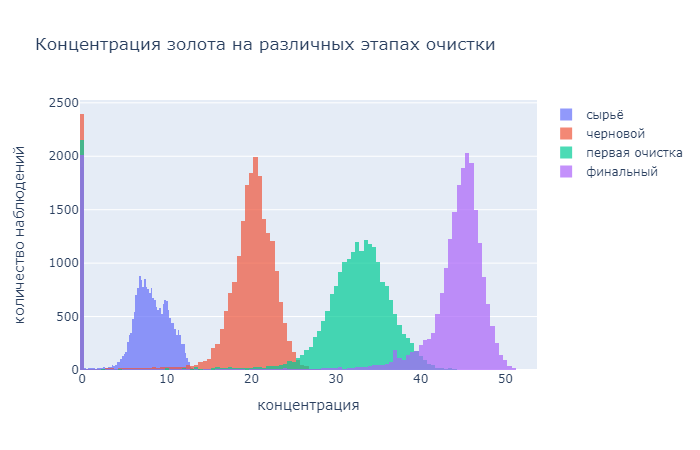

In [19]:
concentrate_hist('au', 'золота')

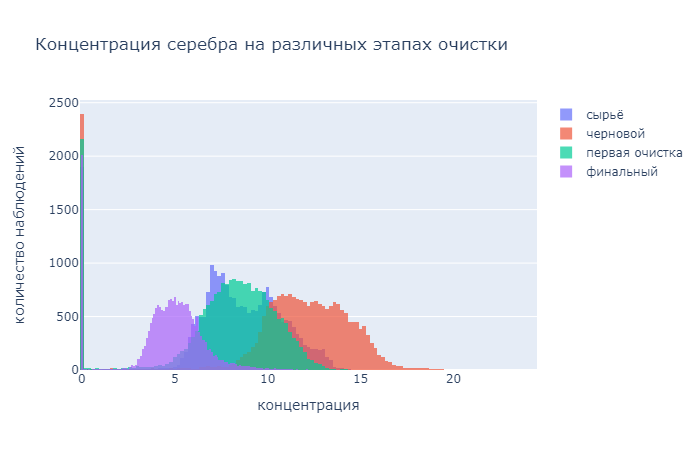

In [20]:
concentrate_hist('ag', 'серебра')

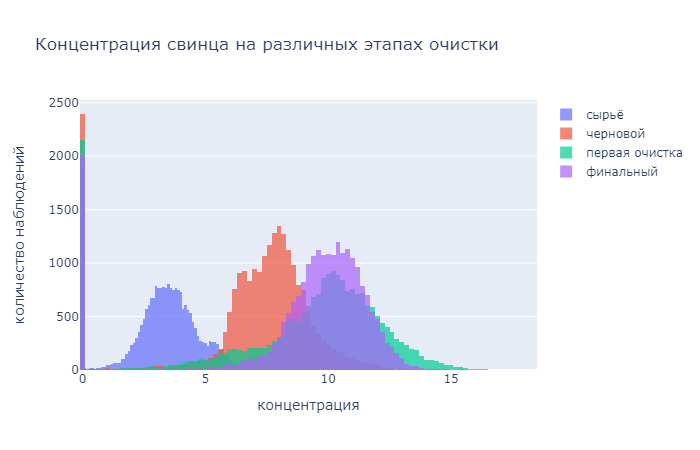

In [21]:
concentrate_hist('pb', 'свинца')

#### Вывод:
- Для золота наблюдается явная зависимость увеличения концентрации по мере очистки
- Концентрация серебра увеличивается после флотации и далее снижается по мере очистки
- Концентрация свинца увеличивается после флотации и первой очистки, далее почти не изменяется

#### 2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

Функция для построения графика распределения размеров гранул сырья на обучающей и тестовой выборках

In [22]:
def feed_size_hist(step, title):
    x0 = train[f'{step}.input.feed_size']
    x1 = test[f'{step}.input.feed_size']

    fig = go.Figure()
    fig.add_trace(go.Histogram(x=x0, name='train'))
    fig.add_trace(go.Histogram(x=x1, name='test'))

    fig.update_layout(title_text=f'Распределение размеров гранул сырья для {title}',
                      xaxis_title_text='размер гранулы',
                      yaxis_title_text='количество наблюдений',
                      barmode='overlay')
    fig.update_traces(opacity=0.7)
    fig.show('png')

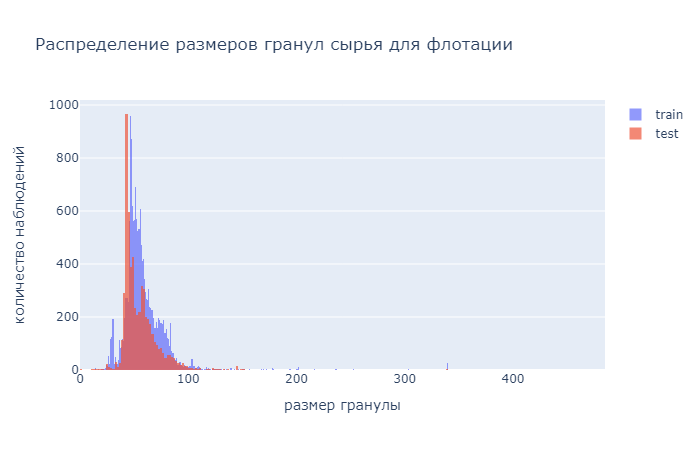

In [23]:
feed_size_hist('rougher', 'флотации')

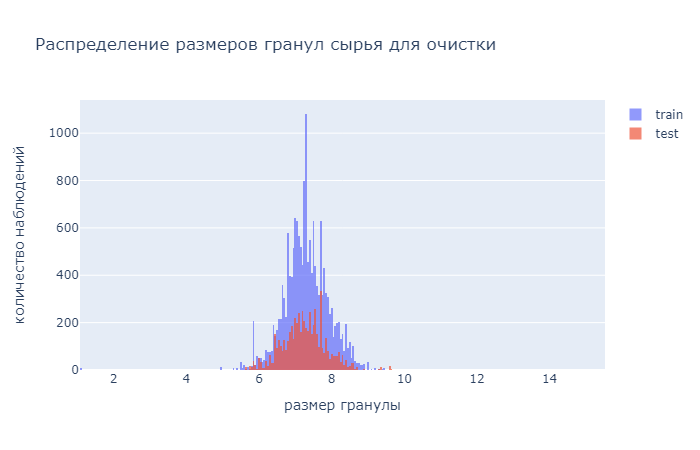

In [24]:
feed_size_hist('primary_cleaner', 'очистки')

На обоих этапах размеры гранул примерно одинаково распределены на обучающей и тестовой выборках

#### 2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.

Создаю признаки для каждого этапа с суммарной концентрацией всех веществ

In [25]:
elems = ['au', 'ag', 'pb', 'sol']

In [26]:
steps = ['rougher.input.feed_',
         'rougher.output.concentrate_', 
         'final.output.concentrate_']

In [27]:
for step in steps:
    df[step] = df[step + elems[0]] + df[step + elems[1]] + df[step + elems[2]] + df[step + elems[3]]

График распределения суммарной концентрации всех веществ

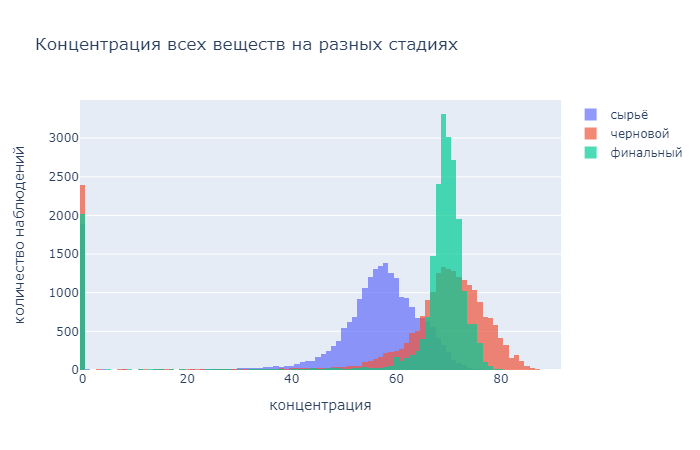

In [28]:
x1 = df['rougher.input.feed_']
x2 = df['rougher.output.concentrate_']
x3 = df['final.output.concentrate_']

fig = go.Figure()
fig.add_trace(go.Histogram(x=x1, name='сырьё'))
fig.add_trace(go.Histogram(x=x2, name='черновой'))
fig.add_trace(go.Histogram(x=x3, name='финальный'))
fig.update_layout(title_text='Концентрация всех веществ на разных стадиях',
                xaxis_title_text='концентрация',
                yaxis_title_text='количество наблюдений',
                    barmode='overlay')
fig.update_traces(opacity=0.7)
fig.show('png')

In [29]:
df[steps].describe()

,rougher.input.feed_,rougher.output.concentrate_,final.output.concentrate_
count,22241.000000,22526.000000,22328.000000
mean,52.273449,61.799418,62.475148
std,17.653233,23.168341,20.744652
min,0.000000,0.000000,0.000000
25%,51.784664,63.558831,67.200835
50%,56.939323,69.459530,69.294183
75%,61.519755,74.058219,71.165495
max,76.978947,90.964431,80.210644


На каждом этапе около 2000 нулевых значений. Возможно, это ошибка измерения. Удаляю строки, в которых на каждом из этапов суммарная концентрация всех веществ равна 0, как неинформативные для построения модели

In [30]:
df.shape

(22716, 95)

In [31]:
df = df[(df['rougher.input.feed_'] != 0) &
         (df['rougher.output.concentrate_'] != 0) & 
         (df['final.output.concentrate_'] != 0)]

In [32]:
df.shape

(20472, 95)

#### Вывод:
- После флотации увеличивается концентрация веществ и далее в ходе очистки сокращается интервал распределения с 50-90 до 60-80.
- Удалены строки, в которых на каждом из этапов суммарная концентрация всех веществ равна 0

# 3. Модель

#### 3.1. Напишите функцию для вычисления итогового sMAPE.

Функция для вычисления итогового sMAPE

In [33]:
def final_smape(target_r, pred_r, target_f, pred_f):
    '''
    target_r - целевой признак(эффективность обогащения чернового концентрата) 
    pred_r - предсказание эффективности обогащения чернового концентрата
    target_f - целевой признак(эффективность обогащения финального концентрата) 
    pred_f - предсказание эффективности обогащения финального концентрата
    '''
    rougher = 100/len(target_r)*np.sum(2*np.abs(pred_r-target_r)/(np.abs(target_r)+np.abs(pred_r)))
    final = 100/len(target_f)*np.sum(2*np.abs(pred_f-target_f)/(np.abs(target_f)+np.abs(pred_f)))
    return 0.25 * rougher + 0.75 * final

#### 3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

Удаляю строки с пропущенными значениями

In [34]:
data = df.dropna()

Удаляю признаки, которых нет в тестовой выборке, за исключением целевых

In [35]:
targets = ['rougher.output.recovery', 'final.output.recovery']
train_targets = list(itertools.filterfalse(targets.__contains__, iter(only_train)))

In [36]:
data = data.drop(train_targets, axis=1)

Создаю переменные для целевых признаков

In [37]:
y_rougher = data['rougher.output.recovery']
y_final = data['final.output.recovery']

Чтобы избежать утечки данных, удаляю признаки `rougher.output.concentrate_`, `final.output.concentrate_`, а также удаляю дату и целевые признаки

In [38]:
data = data.drop(['date', 'rougher.output.recovery', 'final.output.recovery',
                  'rougher.output.concentrate_', 'final.output.concentrate_'], axis=1)

Для каждого целевого признака с помощью `train_test_split` разбиваю данные на две выборки: обучающую и тестовую в соотношении 75 к 25.

In [41]:
X_train_r, X_test_r, y_train_r, y_test_r = \
train_test_split(data, y_rougher, test_size=0.25, random_state=42)

In [42]:
X_train_f, X_test_f, y_train_f, y_test_f = \
train_test_split(data, y_final, test_size=0.25, random_state=42)

In [44]:
(X_train_f.shape), (X_test_f.shape), (y_train_f.shape), (y_test_f.shape)

((11814, 58), (3939, 58), (11814,), (3939,))

#### Решающее дерево и случайный лес

Для `DecisionTreeRegressor` и `RandomForestRegressor` поиск будет осуществляться по гиперпараметрам `max_depth`. Создаю переменную `tree_params` c различными вариантами значений

In [47]:
tree_params = {'max_depth': list(range(4, 25))}

Выбор гиперпараметров для решающего дерева и обучение моделей. Для поиска оптимального значения использую `GridSearchCV` с кросс-валидацией на пяти подвыборках.

In [48]:
grid_dtr_r = GridSearchCV(DecisionTreeRegressor(random_state=42),
                         tree_params, cv=5, n_jobs=-1, scoring='r2') 
grid_dtr_r.fit(X_train_r, y_train_r)
params = grid_dtr_r.best_params_
dtr_r = DecisionTreeRegressor(**params, random_state = 42)
dtr_r.fit(X_train_r, y_train_r)
grid_dtr_r.best_params_

{'max_depth': 11}

In [49]:
grid_dtr_f = GridSearchCV(DecisionTreeRegressor(random_state=42),
                         tree_params, cv=5, n_jobs=-1, scoring='r2') 
grid_dtr_f.fit(X_train_f, y_train_f)
params = grid_dtr_f.best_params_
dtr_f = DecisionTreeRegressor(**params, random_state = 42)
dtr_f.fit(X_train_f, y_train_f)
grid_dtr_f.best_params_

{'max_depth': 6}

Расчёт итогового sMAPE для `DecisionTreeRegressor` на тестовой выборке

In [50]:
pred_rougher = dtr_r.predict(X_test_r)
pred_final = dtr_f.predict(X_test_f)
final_smape(y_test_r, pred_rougher, y_test_f, pred_final)

5.801186715640526

Выбор гиперпараметров для случайного леса и обучение моделей. Для поиска оптимального значения использую `GridSearchCV` с кросс-валидацией на пяти подвыборках.

In [51]:
grid_rfr_r = GridSearchCV(RandomForestRegressor(random_state=42), tree_params, cv=5, scoring='r2', n_jobs=-1) 
grid_rfr_r.fit(X_train_r, y_train_r)
params = grid_rfr_r.best_params_
rfr_r = RandomForestRegressor(**params, random_state = 42)
rfr_r.fit(X_train_r, y_train_r)
grid_rfr_r.best_params_

{'max_depth': 20}

In [52]:
grid_rfr_f = GridSearchCV(RandomForestRegressor(random_state=42), tree_params, cv=5, scoring='r2', n_jobs=-1) 
grid_rfr_f.fit(X_train_f, y_train_f)
params = grid_rfr_f.best_params_
rfr_f = RandomForestRegressor(**params, random_state = 42)
rfr_f.fit(X_train_f, y_train_f)
grid_rfr_f.best_params_

{'max_depth': 20}

Расчёт итогового sMAPE для `RandomForestRegressor` на тестовой выборке

In [53]:
pred_rougher = rfr_r.predict(X_test_r)
pred_final = rfr_f.predict(X_test_f)
final_smape(y_test_r, pred_rougher, y_test_f, pred_final)

4.741918512090487

#### Линейная регрессия

Для `LinearRegression` поиск будет осуществляться по гиперпараметрам `fit_intercept`, `normalize` и `copy_X`. Создаю переменную `parameters` c различными вариантами значений указанных гиперпараметров.

In [54]:
parameters ={'fit_intercept':[True, False],
             'normalize':[True, False],
             'copy_X':[True, False]}

Выбор гиперпараметров для линейной регрессии и обучение моделей. Для поиска оптимального значения использую `GridSearchCV` с кросс-валидацией на пяти подвыборках.

In [55]:
grid_lr_r = GridSearchCV(LinearRegression(),
                       parameters, cv=5, n_jobs=-1, scoring='r2')
grid_lr_r.fit(X_train_r, y_train_r)
params = grid_lr_r.best_params_
lr_r = LinearRegression(**params)
lr_r.fit(X_train_r, y_train_r)
grid_lr_r.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [56]:
grid_lr_f = GridSearchCV(LinearRegression(),
                       parameters, cv=5, n_jobs=-1, scoring='r2')
grid_lr_f.fit(X_train_f, y_train_f)
params = grid_lr_f.best_params_
lr_f = LinearRegression(**params)
lr_f.fit(X_train_f, y_train_f)
grid_lr_f.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

Расчёт итогового sMAPE для `LinearRegression` на тестовой выборке

In [57]:
pred_rougher = lr_r.predict(X_test_r)
pred_final = lr_f.predict(X_test_f)
final_smape(y_test_r, pred_rougher, y_test_f, pred_final)

6.0982976697620686

#### Вывод:
- На тестовой выборке лучшее значение `sMAPE` у моделей `RandomForestRegressor` 4.8%. У `DecisionTreeRegressor` 5.8% и чуть меньше у `LinearRegression` - 6.1%